In [1]:
from pyhht.visualization import plot_imfs
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import os

In [2]:
# 列出目錄
os.getcwd()

'D:\\jupyter_notebook\\denoise'

(64449,)


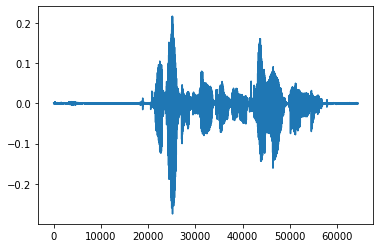

In [6]:
old_voice = './clean/angelababy/angelababy_T01-3_20200626.wav'
data, sr = librosa.load(old_voice, sr=16000)
print(data.shape)
plt.plot(data);
ipd.Audio(data, rate=16000)

(53409,)


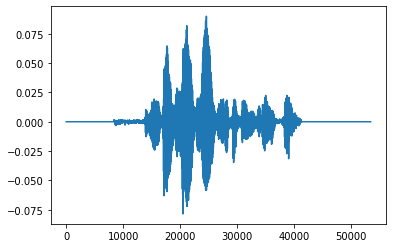

In [34]:
# define the start and end of vocal (voice_start and voice_end)
old_voice = './clean/angelababy/angelababy_T28-1_20200626.wav'
arr = np.where(data>data[abs(data)>0.025][0])[0]
voice_start = arr[arr>10000][0] - 1600
voice_end = np.where(data==data[abs(data)>0.01][-1])[0][-1] + 1600

# turn the values except the vocal into 0.0
data[:voice_start] = 0.0
data[voice_end:] = 0.0

plt.plot(data);
ipd.Audio(data, rate=16000)

In [99]:
# preprocess all of datas and archive
for name in os.listdir('./clean_final/clean/yanbo/'):
    old_voice = f'./clean_final/clean/yanbo/{name}'
    data, sr = librosa.load(old_voice, sr=16000)
    
    # define the voice_start and voice_end
    arr = np.where(data>data[abs(data)>0.03][0])[0]
    voice_start = arr[arr>10000][0] - 1600
    voice_end = np.where(data==data[abs(data)>0.002][-1])[0][-1] + 1600
    # turn the values except the voice into 0.0
    data[:voice_start] = 0.0
    data[voice_end:] = 0.0
    # make the new and clean data
    old_voice = f'./processed_data/yanbo/{name}'
    librosa.output.write_wav(old_voice, y=data, sr=16000)
print('-----finished-----')

-----finished-----
